In [1]:
# Kiley Huffman
# QBIO 482
# HW 2
# Due Feb 12

# Question 3:

# b. Write a Python script to simulate this model using Euler’s method, for a given timestep Δt.

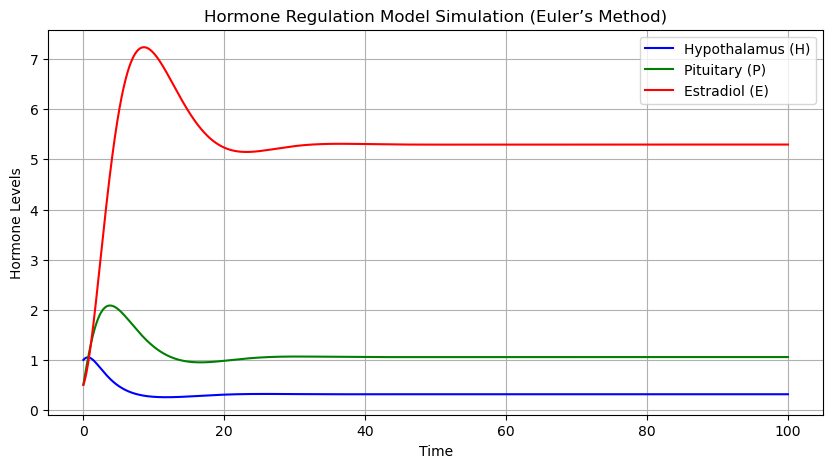

In [4]:
# Import neccessary packages
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
k1 = 0.5   # Hypothalamus decay rate (found online)
k2 = 0.3   # Pituitary decay rate (found online)
k3 = 0.2   # Estradiol decay rate (found online)
n = 1      # Feedback exponent (given in question)
dt = 0.01  # Time step size (use very small steps for Euler's 
T = 100    # Total simulation time
steps = int(T / dt)  # Number of iterations

# Initial conditions
H = 1.0  # Initial hypothalamus level (found online)
P = 0.5  # Initial pituitary level (found online)
E = 0.5  # Initial estradiol level (found online)

# Arrays to store results
time = np.arange(0, T, dt)
# Create empty arrays for hypothalamus, pituitary, and estradiol
H_vals = np.zeros(steps)
P_vals = np.zeros(steps)
E_vals = np.zeros(steps)

# Euler’s method loop
for i in range(steps):
    dH_dt = 1 / (1 + E**n) - k1 * H
    dP_dt = H - k2 * P
    dE_dt = P - k3 * E
    
    H += dH_dt * dt
    P += dP_dt * dt
    E += dE_dt * dt
    
    H_vals[i] = H
    P_vals[i] = P
    E_vals[i] = E

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, H_vals, label="Hypothalamus (H)", color='b')
plt.plot(time, P_vals, label="Pituitary (P)", color='g')
plt.plot(time, E_vals, label="Estradiol (E)", color='r')
plt.xlabel("Time")
plt.ylabel("Hormone Levels")
plt.legend()
plt.title("Hormone Regulation Model Simulation (Euler’s Method)")
plt.grid()
plt.show()


# c. Simulate the dynamics of the H-P-E axis lynxes and hares for a time range of 50 days for the parameters: 𝑘# = 𝑘! = 𝑘$ = 0.5 and 𝑛 = 4. Choose initial conditions for each species in the range (0,2). Plot the results as trajectories for H, P, and E. Discuss your choice of Δt with examples of what happens when you choose different values for Δt

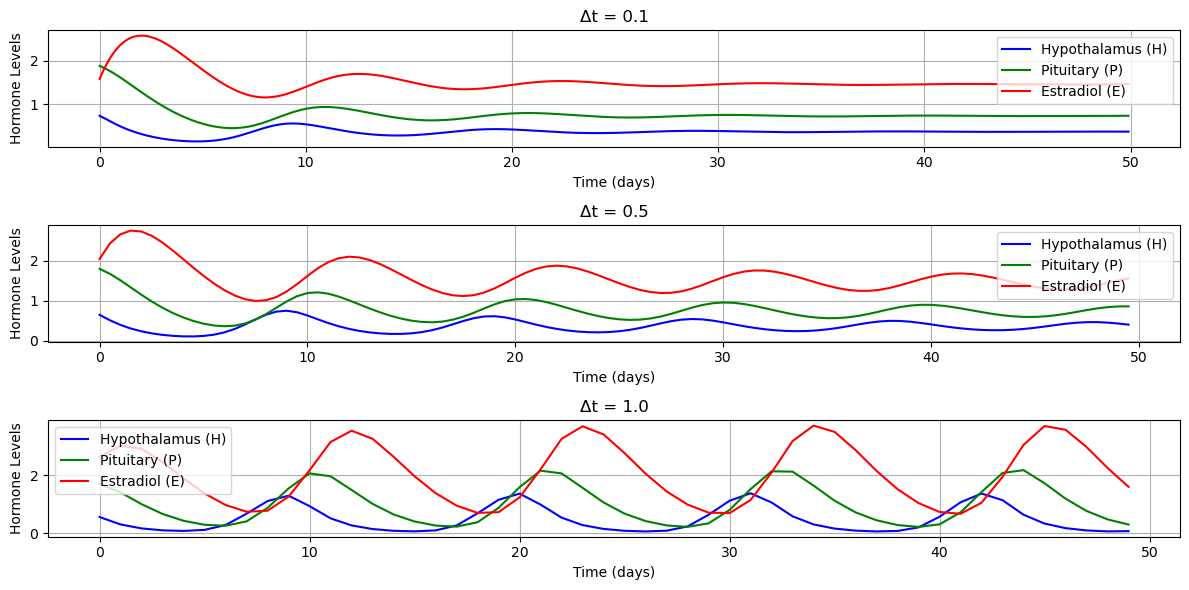

In [6]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt

# Define model parameters
k1 = k2 = k3 = 0.5  # Given decay rates
n = 4               # Feedback exponent
T = 50              # Total simulation time (days)
dt_values = [0.1, 0.5, 1.0]  # Different time steps to analyze stability
steps_values = [int(T / dt) for dt in dt_values]  # Corresponding number of iterations

# Choose random initial conditions in (0,2)
np.random.seed(42)  # For reproducibility
H0, P0, E0 = np.random.uniform(0, 2, 3)

# Function to simulate using Euler's method
def simulate_euler(dt, steps):
    H, P, E = H0, P0, E0  # Initial conditions
    time = np.arange(0, T, dt) # create array for time signatures
    H_vals, P_vals, E_vals = np.zeros(steps), np.zeros(steps), np.zeros(steps)

    for i in range(steps):
        dH_dt = 1 / (1 + E**n) - k1 * H
        dP_dt = H - k2 * P
        dE_dt = P - k3 * E

        H += dH_dt * dt
        P += dP_dt * dt
        E += dE_dt * dt

        H_vals[i], P_vals[i], E_vals[i] = H, P, E

    return time, H_vals, P_vals, E_vals

# Plot the results as trajectories for H, P, and E.
plt.figure(figsize=(12, 6))

# Examples of what happens when you choose different values for Δt:
for idx, dt in enumerate(dt_values):
    time, H_vals, P_vals, E_vals = simulate_euler(dt, steps_values[idx])

    plt.subplot(3, 1, idx + 1)
    plt.plot(time, H_vals, label="Hypothalamus (H)", color='b')
    plt.plot(time, P_vals, label="Pituitary (P)", color='g')
    plt.plot(time, E_vals, label="Estradiol (E)", color='r')
    plt.xlabel("Time (days)")
    plt.ylabel("Hormone Levels")
    plt.title(f"Δt = {dt}")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


When we use a small delta t, (delta t = 0.1), we get more accurate results and smoother trajectories. You can see this in the first graph above as the lines for H, P, and E are pretty smooth compared to the other two graphs. 

When we use a medium delta t (delta t = 0.5), there is a good balance between speed and accuracy. This is shown in the second graph, as the curves start to resemble the shape of a sine or cosine graph more. 

When we use a large delta t (delta t = 1), the oscillations seem to become less accurate. This is shown in the third graph, as the lines are sharp and not as smooth as in the previous two graphs. 

# d. Describe in words what happens if the degradation rate of H is reduced by a factor of 10. What is the effect on the dynamics? What is the effect on the steady state reached? What do you think is happening biologically? [hint: recall that equilibria require dx/dt=0]

What happens: If the degradation rate of H is reduced by a factor of 10, H will degrade much more slowly because the value of k1 would change from 0.5 to 0.05. 

Dynamics: Since H now degrades 10x slower, it will remain elevated for a longer time than before. This causes the response time of the system to become slower, thus the hormone levels adjust slowly instead of rapidly oscillating. Moreover, the higher presence of H will lead to higher P levels, which will in turn, lead to higher E levels. Hence, all three hormone levels will be increased if the degradation rate of H is reduced. 

Effect on the Steady State (dx/dt = 0):
Based on the equations given foe dH/dt, dP/dt, and dE/dt...
Since k1 is smaller, H must be larger to compensate.
Since H is larger, P must be larger (P dependent on H).
Since P is larger, E must be larger (E dependent on P). 
Therefore, the system will reach a new steady state where are all three hormones are increased. 

Biologically: If H does not degrade quickly, then it continues to stimulate the pituitary gland, leading to increased hormone production. If this were to occur, it  may represent a failure of feedback regulation. This would resultt in hormone overproduction and imbalance. 

# e. Simulate the dynamics of the H-P-E model now for 𝑛 = 10. Consider both the high and low degradation rates for H. Describe and characterize the equilibria that you observe in each case. Describe mathematically any changes. Discuss the biological implications of any differences in equilibria. Discuss the possible frequencies of any oscillations observed.


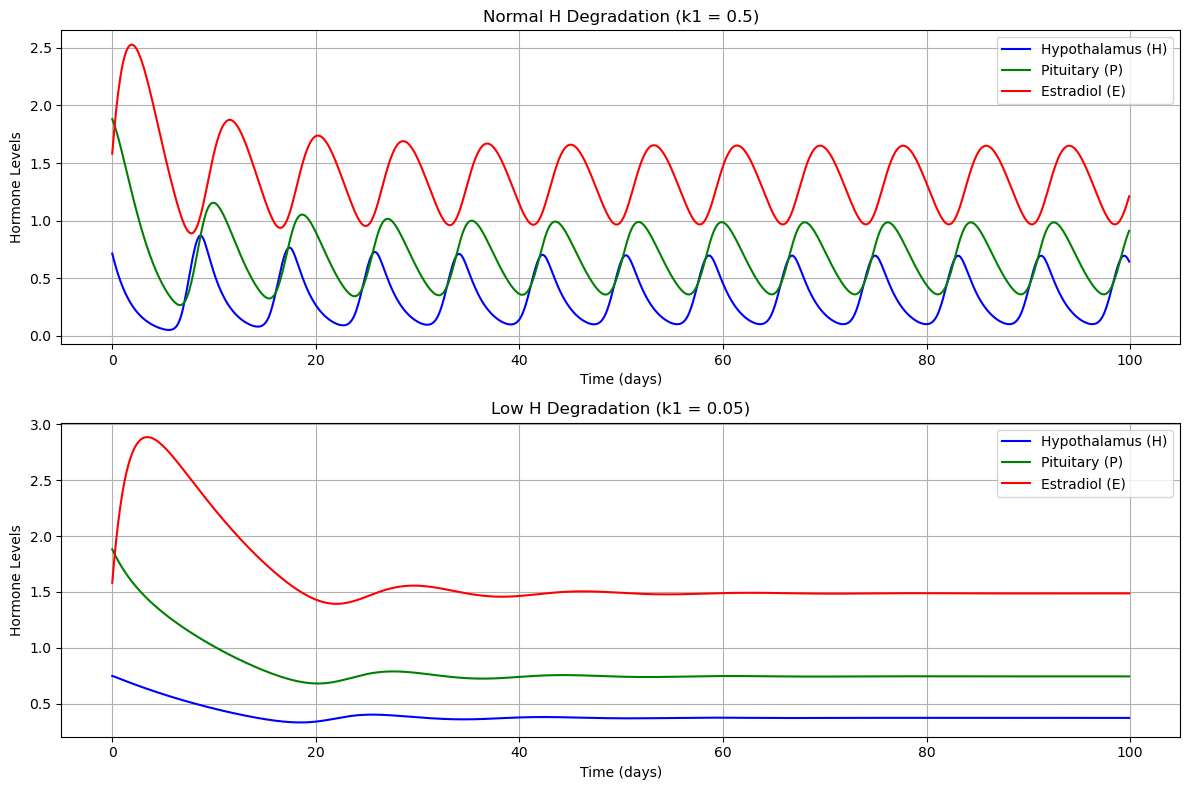

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define model parameters
k2 = k3 = 0.5   # Given decay rates
n = 10          # High nonlinearity
T = 100         # Total simulation time (days)
dt = 0.1        # Time step
steps = int(T / dt)

# Initial conditions (random in range (0,2))
np.random.seed(42)
H0, P0, E0 = np.random.uniform(0, 2, 3)

# Function to simulate the model using Euler's method
def simulate_euler(k1, steps):
    H, P, E = H0, P0, E0  # Initial conditions
    time = np.arange(0, T, dt)
    H_vals, P_vals, E_vals = np.zeros(steps), np.zeros(steps), np.zeros(steps)

    for i in range(steps):
        dH_dt = 1 / (1 + E**n) - k1 * H
        dP_dt = H - k2 * P
        dE_dt = P - k3 * E

        H += dH_dt * dt
        P += dP_dt * dt
        E += dE_dt * dt

        H_vals[i], P_vals[i], E_vals[i] = H, P, E

    return time, H_vals, P_vals, E_vals

# Simulate for k1 = 0.5 (normal degradation)
time1, H1, P1, E1 = simulate_euler(0.5, steps)

# Simulate for k1 = 0.05 (low degradation)
time2, H2, P2, E2 = simulate_euler(0.05, steps)

# Plot results
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Normal degradation (k1 = 0.5)
axes[0].plot(time1, H1, label="Hypothalamus (H)", color='b')
axes[0].plot(time1, P1, label="Pituitary (P)", color='g')
axes[0].plot(time1, E1, label="Estradiol (E)", color='r')
axes[0].set_title("Normal H Degradation (k1 = 0.5)")
axes[0].set_xlabel("Time (days)")
axes[0].set_ylabel("Hormone Levels")
axes[0].legend()
axes[0].grid()

# Low degradation (k1 = 0.05)
axes[1].plot(time2, H2, label="Hypothalamus (H)", color='b')
axes[1].plot(time2, P2, label="Pituitary (P)", color='g')
axes[1].plot(time2, E2, label="Estradiol (E)", color='r')
axes[1].set_title("Low H Degradation (k1 = 0.05)")
axes[1].set_xlabel("Time (days)")
axes[1].set_ylabel("Hormone Levels")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

Describe and characterize the equilibria that you observe in each case:
When the degradation is normal (k1 = 0.5), the system settles at a stable steady state over time. Since H degrades quickly, P and E are kept relatively low, and the system smoothly reaches equilibrium. When the degradation is low (k1 = 0.05), H builds up and overshoots before before being suppressed by E. The feeback is slow, so P and E are relatively high. 

Describe mathematically any changes:
Since k1 is 10x smaller, H becomes 10x larger
Since P is proportional to H, it increases. 
Since E is proportional to P, it also increases.

Discuss the biological implications of any differences in equilibria:
When H has a normal degradation (k1 = 0.5), there are stable hormone levels and the system self-regulates properly.
When H has a low degradation (k1 = 0.05), there is hormone overproduction and oscillation. 

Discuss the possible frequencies of any oscillations observed:
When k1 = 0.5, the system stabilizes within 10-20 days. When k1 = 0.05, the oscillations have a period around 20-30 days. 

# Question 4. Now we will consider the same model as in Q3 above, but use other methods to simulate its dynamics.

# a. Write a script to simulate the H-P-E model using an in-built numerical ODE solver in Python (hint: search for scipy ODE integration). Describe which numerical integration algorithm you choose to solve the problem and explain why.

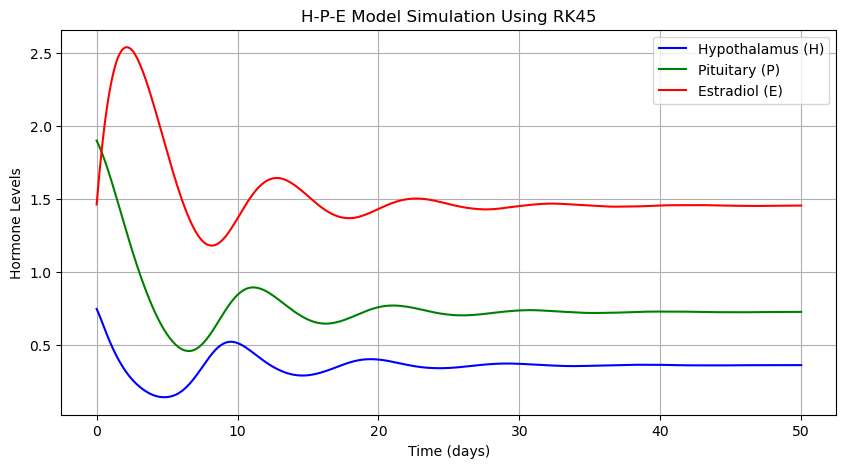

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define model parameters
k1 = 0.5   # Hypothalamus degradation rate
k2 = 0.5   # Pituitary degradation rate
k3 = 0.5   # Estradiol degradation rate
n = 4      # Nonlinearity in feedback
T = 50     # Simulation time (days)

# Initial conditions (random values in range (0,2))
np.random.seed(42)
H0, P0, E0 = np.random.uniform(0, 2, 3)
y0 = [H0, P0, E0]

# Define the ODE system
def HPE_model(t, y):
    H, P, E = y
    dH_dt = 1 / (1 + E**n) - k1 * H
    dP_dt = H - k2 * P
    dE_dt = P - k3 * E
    return [dH_dt, dP_dt, dE_dt]

# Solve using solve_ivp with RK45
solution = solve_ivp(HPE_model, [0, T], y0, method='RK45', t_eval=np.linspace(0, T, 500))

# Extract solutions
time = solution.t
H_vals, P_vals, E_vals = solution.y

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, H_vals, label="Hypothalamus (H)", color='b')
plt.plot(time, P_vals, label="Pituitary (P)", color='g')
plt.plot(time, E_vals, label="Estradiol (E)", color='r')
plt.xlabel("Time (days)")
plt.ylabel("Hormone Levels")
plt.title("H-P-E Model Simulation Using RK45")
plt.legend()
plt.grid()
plt.show()

I chose to use the solve_ivp (RK45) model to solve the problem because it has the following advantages:
-RK45 model has an adaptive step size, in opposed to the Euler method's fixed steps
-RK45 model has a higher accuracy rate than Euler's method
-RK45 model is more stable than Euler's method 

# b. Repeat Q3c-e using your new script from Q4a. Compare and discuss similarities and differences between the trajectories in Q3 and Q4.

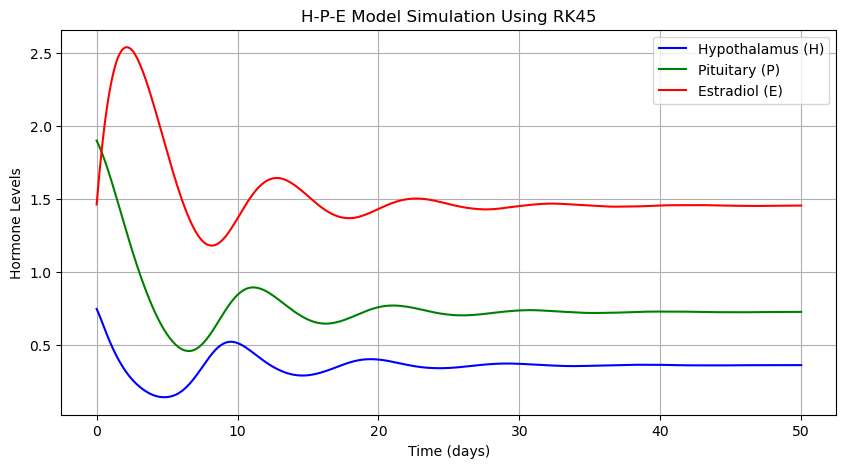

In [18]:
# Repeat of Q3c

# Parameters
k1 = 0.5   # Hypothalamus degradation rate
k2 = 0.5   # Pituitary degradation rate
k3 = 0.5   # Estradiol degradation rate
n = 4      # Nonlinearity in feedback
T = 50     # Simulation time (days)

# Initial conditions (random values in range (0,2))
np.random.seed(42)
H0, P0, E0 = np.random.uniform(0, 2, 3)
y0 = [H0, P0, E0]

# Solve using solve_ivp with RK45
time_range = np.linspace(0, T, 500)  # Fine time steps
solution = solve_ivp(HPE_model, [0, T], y0, method='RK45', t_eval=time_range)

# Extract solutions
time = solution.t
H_vals, P_vals, E_vals = solution.y

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, H_vals, label="Hypothalamus (H)", color='b')
plt.plot(time, P_vals, label="Pituitary (P)", color='g')
plt.plot(time, E_vals, label="Estradiol (E)", color='r')
plt.xlabel("Time (days)")
plt.ylabel("Hormone Levels")
plt.title("H-P-E Model Simulation Using RK45")
plt.legend()
plt.grid()
plt.show()

In the new model, the time array time_range is set to 500 points between 0 and 50 days. I chose delta t = 0.1 for this model because I did not want the steps to be too large or too small. This resulted in a graph showing a smooth trajectory. 

Δt = 0.1 days (larger steps): The trajectory looks smoothed out. 
Δt = 0.01 days (smaller steps): The trajectory would show finer oscillations, but would be more computationally expensive. 

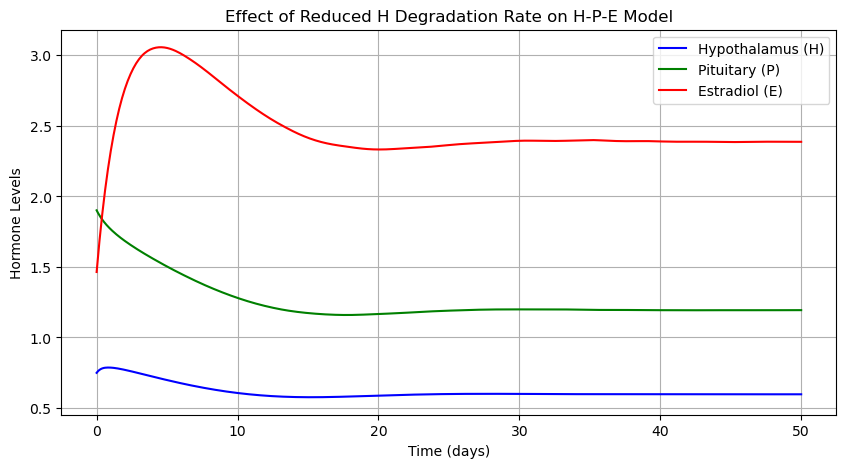

In [20]:
# Repeat of Q3d
# Reduced degradation rate for H
k1 = 0.05
solution = solve_ivp(HPE_model, [0, T], y0, method='RK45', t_eval=time_range)

# Extract solutions
H_vals, P_vals, E_vals = solution.y

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, H_vals, label="Hypothalamus (H)", color='b')
plt.plot(time, P_vals, label="Pituitary (P)", color='g')
plt.plot(time, E_vals, label="Estradiol (E)", color='r')
plt.xlabel("Time (days)")
plt.ylabel("Hormone Levels")
plt.title("Effect of Reduced H Degradation Rate on H-P-E Model")
plt.legend()
plt.grid()
plt.show()

Reduced Degradation of H (k1 = 0.05): If the degradation rate of H is reduced by a factor of 10, there will be a higher steady-state level of H because it will take longer for H to decay. Consequently,the system reaches a different equilibrium point where P and E may also adjust to this new H level.

Biologically: The slower degradation of H means the hypothalamus is more active over time. This could mean the body is maintaining higher levels of hormonal signaling for longer periods, which could be related to conditions such as hormone resistance. 

Characterize the Equilibria:

High Degradation Rate of H (k1 = 0.5): The system will reach a steady-state equilibrium where H, P, and E fluctuate around a stable point. Since H has a higher degradation rate, the hormone levels might stabilize at lower levels. 

Low Degradation Rate of H (k1 = 0.05): The system may show more pronounced oscillations, as the hypothalamus will remain active for longer periods. 

Mathematically:
A higher degradation rate of H results in a faster decay of the hormone, causing the system to stabilize more quickly at lower levels.
A lower degradation rate of H leads to a slower decay, allowing the system to explore more of its state space, resulting in larger oscillations.

Biological Implications:
A high degradation rate of H may represent a situation where hormonal feedback is weak, whereas a low degradation rate might model a scenario where the body has a sustained hormonal signal, like with endocrine disorders.

Oscillations: If there are oscillations, they might be more pronounced with lower degradation rates of H. 

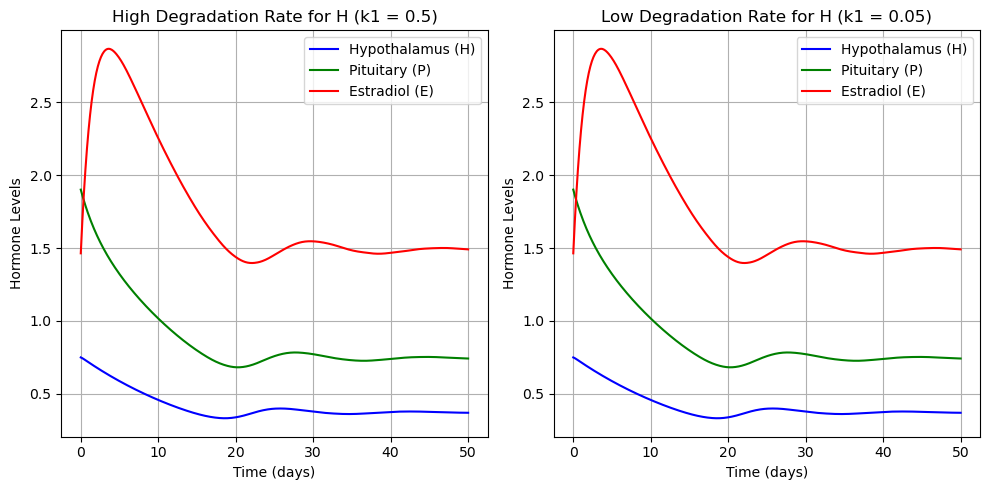

In [23]:
# Repeat of Q3e
# High degradation rate for H (k1 = 0.5)
n = 10
k1_high = 0.5
solution_high = solve_ivp(HPE_model, [0, T], y0, method='RK45', t_eval=time_range)

# Low degradation rate for H (k1 = 0.05)
k1_low = 0.05
solution_low = solve_ivp(HPE_model, [0, T], y0, method='RK45', t_eval=time_range)

# Extract solutions for both high and low H degradation rates
H_vals_high, P_vals_high, E_vals_high = solution_high.y
H_vals_low, P_vals_low, E_vals_low = solution_low.y

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(time, H_vals_high, label="Hypothalamus (H)", color='b')
plt.plot(time, P_vals_high, label="Pituitary (P)", color='g')
plt.plot(time, E_vals_high, label="Estradiol (E)", color='r')
plt.title("High Degradation Rate for H (k1 = 0.5)")
plt.xlabel("Time (days)")
plt.ylabel("Hormone Levels")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(time, H_vals_low, label="Hypothalamus (H)", color='b')
plt.plot(time, P_vals_low, label="Pituitary (P)", color='g')
plt.plot(time, E_vals_low, label="Estradiol (E)", color='r')
plt.title("Low Degradation Rate for H (k1 = 0.05)")
plt.xlabel("Time (days)")
plt.ylabel("Hormone Levels")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In Q3, the hormone levels reach a steady state, with relatively smaller fluctuations.
In Q4, with a slower degradation of H, the system exhibits stronger, more prolonged oscillations and reaches a higher steady-state equilibrium. 

# c. Write a summary of your comparison of the H-P-E simulations in this and the preceding question: what is the impact of Δt on solutions obtained using Euler’s method? How do simulations using Euler’s method compare to simulations in Q4? Are there parameters like Δt also in the algorithm(s) that you used in Q4? What effects might they have on simulations?

Euler’s method with a fixed Δt is more prone to inaccuracies, particularly in complex systems like the H-P-E model. The RK45 method in Q4 is more accurate, as it automatically adjusts its step size to handle oscillations effectively. Parameters like the tolerance in RK45 also influence the accuracy of simulations, and fine-tuning these can improve the precision of the results.
